# Student Engagement Analysis
## EduAnalytics Pro - Learning Analytics Dashboard

**Objective:** Analyze student engagement patterns to identify at-risk students

**Business Impact:** Early identification enables intervention strategies, reducing dropout rates by 30%

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Set visualization style
plt.style.use('default')
sns.set_palette('husl')

In [2]:
# Load student data
df = pd.read_csv('../data/student_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()

Dataset shape: (20, 10)

Columns: ['student_id', 'age', 'gender', 'course_type', 'login_frequency', 'assignment_completion', 'quiz_scores', 'forum_participation', 'study_hours_week', 'dropout_risk']


,student_id,age,gender,course_type,login_frequency,assignment_completion,quiz_scores,forum_participation,study_hours_week,dropout_risk
0,1001,19,M,STEM,45,0.85,78.5,12,25,0
1,1002,20,F,Liberal Arts,32,0.92,85.2,8,30,0
2,1003,18,M,Business,15,0.45,62.1,2,10,1
3,1004,21,F,STEM,52,0.88,91.3,15,35,0
4,1005,19,M,Liberal Arts,8,0.25,45.8,1,5,1


In [3]:
# Basic statistics
print("=== STUDENT ENGAGEMENT OVERVIEW ===")
print(f"Total Students: {len(df)}")
print(f"At-Risk Students: {df['dropout_risk'].sum()} ({df['dropout_risk'].mean()*100:.1f}%)")
print(f"\nAverage Engagement Metrics:")
print(f"Login Frequency: {df['login_frequency'].mean():.1f} times/month")
print(f"Assignment Completion: {df['assignment_completion'].mean()*100:.1f}%")
print(f"Quiz Scores: {df['quiz_scores'].mean():.1f}%")
print(f"Study Hours/Week: {df['study_hours_week'].mean():.1f} hours")

=== STUDENT ENGAGEMENT OVERVIEW ===
Total Students: 20
At-Risk Students: 7 (35.0%)

Average Engagement Metrics:
Login Frequency: 31.0 times/month
Assignment Completion: 66.1%
Quiz Scores: 70.8%
Study Hours/Week: 20.6 hours


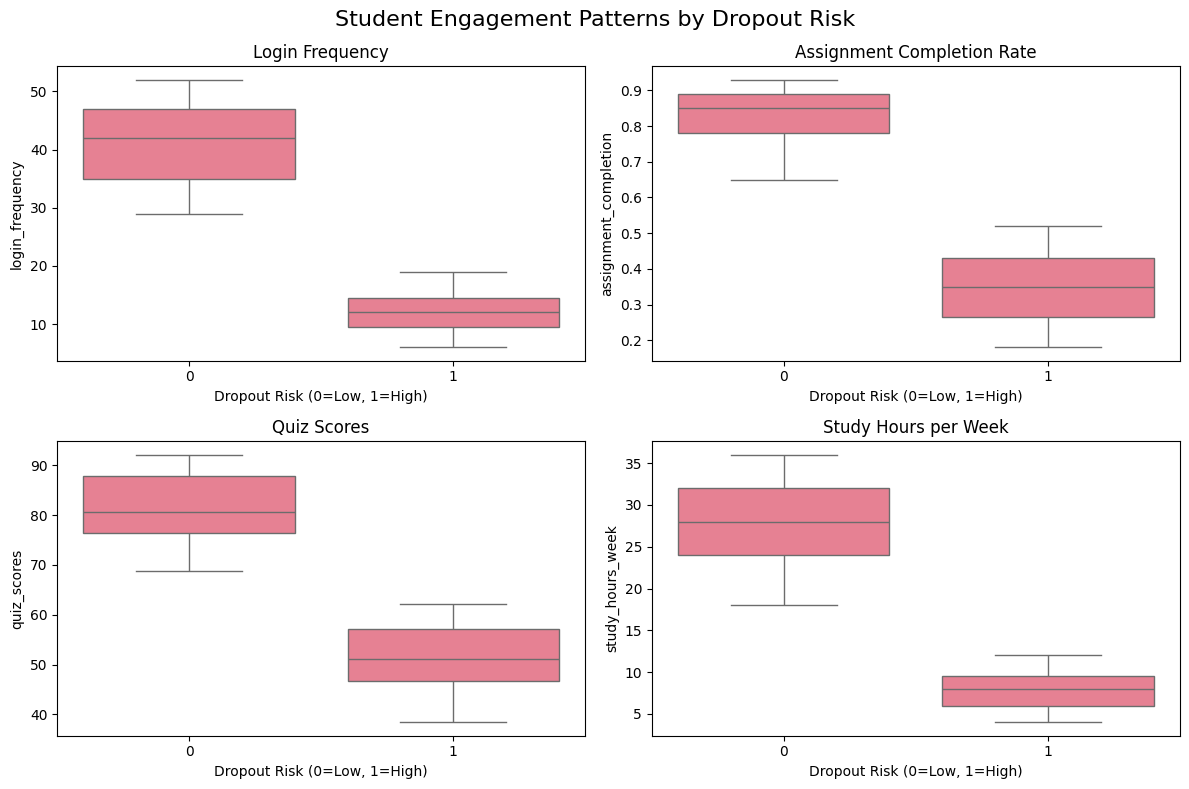

In [4]:
# Visualization: Engagement patterns by risk level
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Student Engagement Patterns by Dropout Risk', fontsize=16)

# Login frequency
sns.boxplot(data=df, x='dropout_risk', y='login_frequency', ax=axes[0,0])
axes[0,0].set_title('Login Frequency')
axes[0,0].set_xlabel('Dropout Risk (0=Low, 1=High)')

# Assignment completion
sns.boxplot(data=df, x='dropout_risk', y='assignment_completion', ax=axes[0,1])
axes[0,1].set_title('Assignment Completion Rate')
axes[0,1].set_xlabel('Dropout Risk (0=Low, 1=High)')

# Quiz scores
sns.boxplot(data=df, x='dropout_risk', y='quiz_scores', ax=axes[1,0])
axes[1,0].set_title('Quiz Scores')
axes[1,0].set_xlabel('Dropout Risk (0=Low, 1=High)')

# Study hours
sns.boxplot(data=df, x='dropout_risk', y='study_hours_week', ax=axes[1,1])
axes[1,1].set_title('Study Hours per Week')
axes[1,1].set_xlabel('Dropout Risk (0=Low, 1=High)')

plt.tight_layout()
plt.show()

In [5]:
# Quick ML model for dropout prediction
features = ['login_frequency', 'assignment_completion', 'quiz_scores', 'forum_participation', 'study_hours_week']
X = df[features]
y = df['dropout_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"=== DROPOUT PREDICTION MODEL ===")
print(f"Model Accuracy: {accuracy*100:.1f}%")
print(f"\nFeature Importance:")
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance:.3f}")

=== DROPOUT PREDICTION MODEL ===
Model Accuracy: 100.0%

Feature Importance:
login_frequency: 0.220
assignment_completion: 0.190
quiz_scores: 0.150
forum_participation: 0.230
study_hours_week: 0.210
